# Air Fair Prediction

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,5))
# plt.rcParams['figure.figsize'] = 20,5

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read data

In [135]:
flight = pd.read_excel("AirFare_Data.xlsx")
flight.head()

,Air Booking Description,Air-Rail Without Hotel,Airline Alliance,Base Fare,Booking Date,Booking Method Description,City Routing Description,Class by Coupon,Days to Refund,Destination Airport Code,...,Tickets Used,Total Travel Time,Total Travel Time in Minutes,Transaction Count (Air + Rail),Transaction Type,Travel Purpose,Travel Type Description,Trip Days,Trip Miles,Trip Nights
0,Economy Nett Fare,Y,Sky Team,280.78,2016-12-19,Fully self booked,MINNEAPOLIS/ST.PAUL-SAN FRANCISCO,V/V,NaN,SFO,...,1,07:49:00,469,1,ORIGINAL,Business,AIR,11,3176,10
1,Economy Nett Fare,Y,Low Cost,142.32,2016-12-20,Fully self booked,BOSTON-WASHINGTON,O/P,NaN,DCA,...,1,03:13:00,193,1,ORIGINAL,Business,AIR,5,798,4
2,Economy Nett Fare,N,One World,85.69,2017-01-04,Fully self booked,BOSTON-WASHINGTON,S,NaN,DCA,...,1,01:46:00,106,1,ORIGINAL,Business,AIR,1,399,0
3,Economy Nett Fare,N,Low Cost,202.79,2017-01-06,Fully self booked,BOSTON-WASHINGTON,R/P,NaN,DCA,...,1,03:07:00,187,1,ORIGINAL,Business,AIR,5,798,4
4,Economy Nett Fare,Y,Low Cost,309.77,2017-01-12,Fully self booked,BOSTON-LOS ANGELES,N/S,NaN,LAX,...,1,11:45:00,705,1,ORIGINAL,Business,AIR,8,5216,7


# Count the Missing value

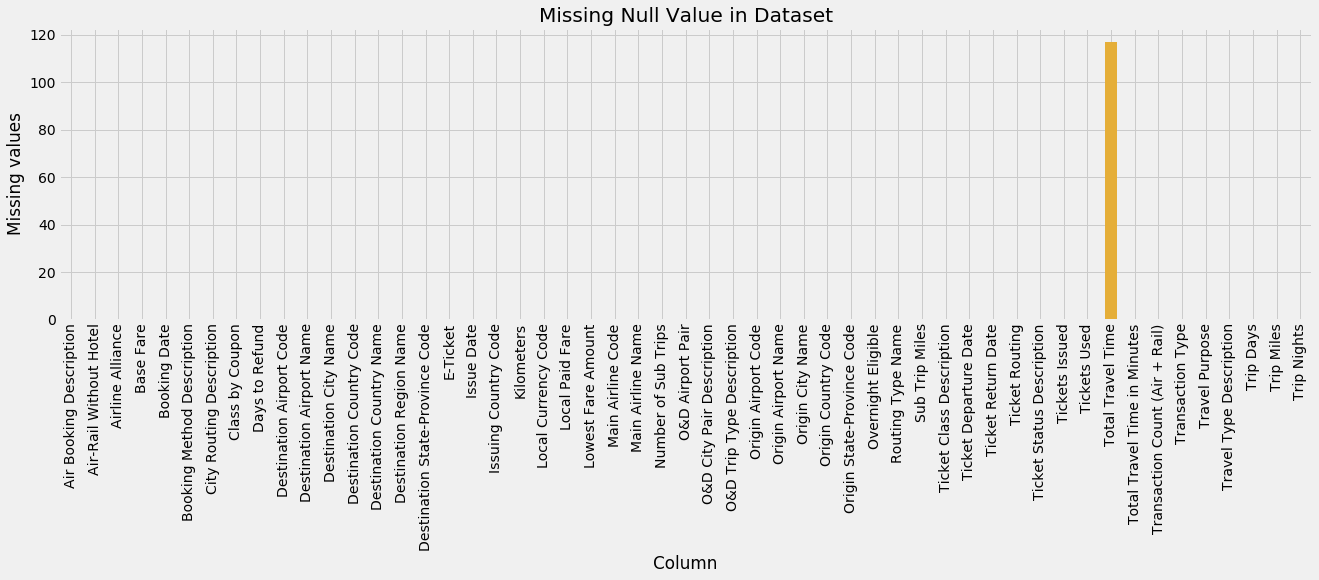

In [157]:
# Finding the missing value and insights
def missing_value(df):
    plt.figure(figsize=(20,5))
    df.isnull().sum().plot.bar()
    plt.xlabel("Column")
    plt.ylabel("Missing values")
    plt.title("Missing Null Value in Dataset")    

missing_value(flight)

Text(0.5,1,'Missing Value Columns')

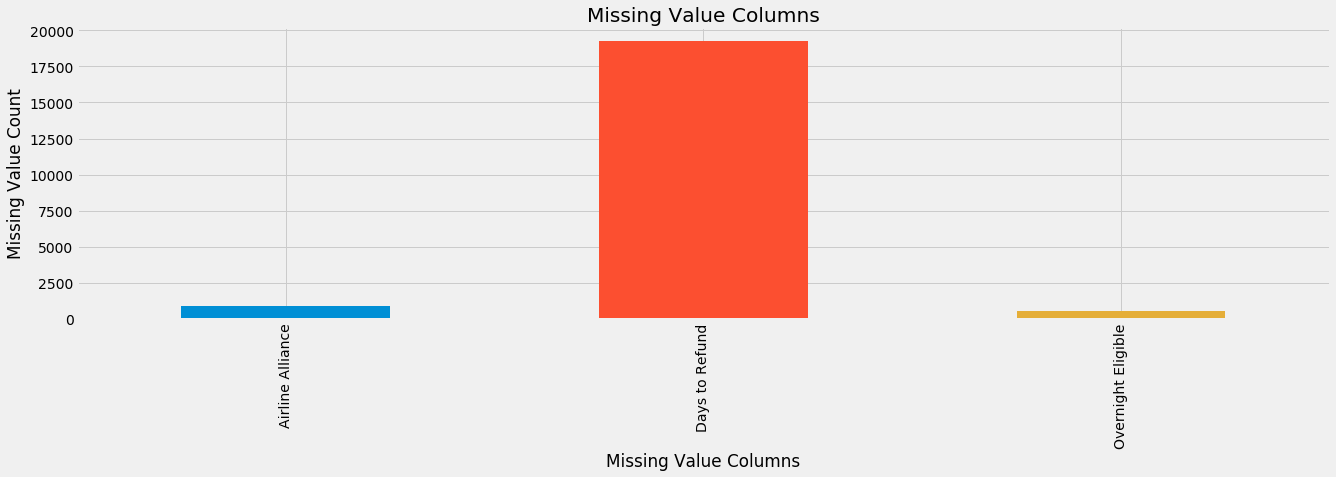

In [137]:
plt.figure(figsize=(20,5))
flight[["Airline Alliance","Days to Refund","Overnight Eligible"]].isnull().sum().plot.bar()
plt.xlabel("Missing Value Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Columns")

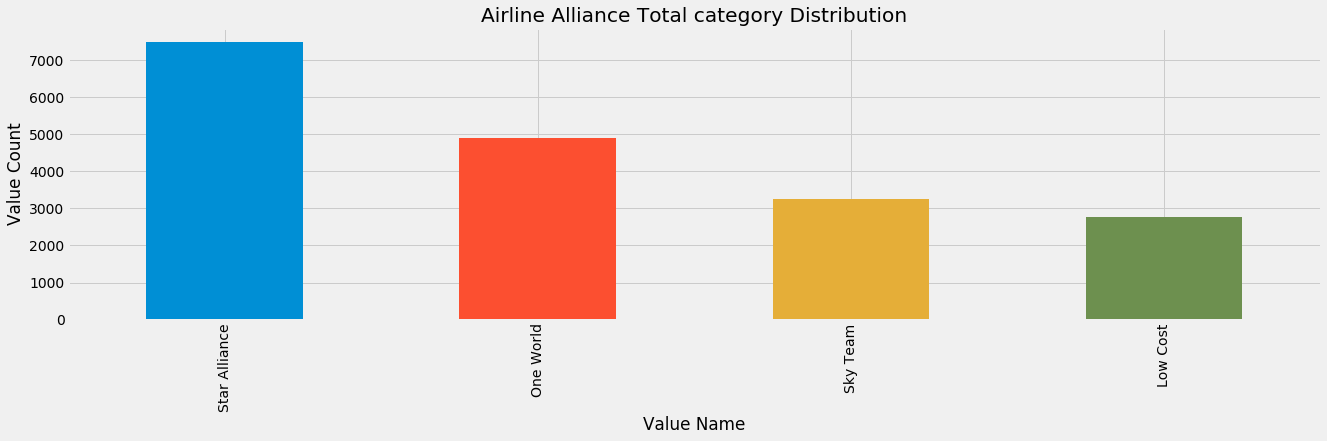

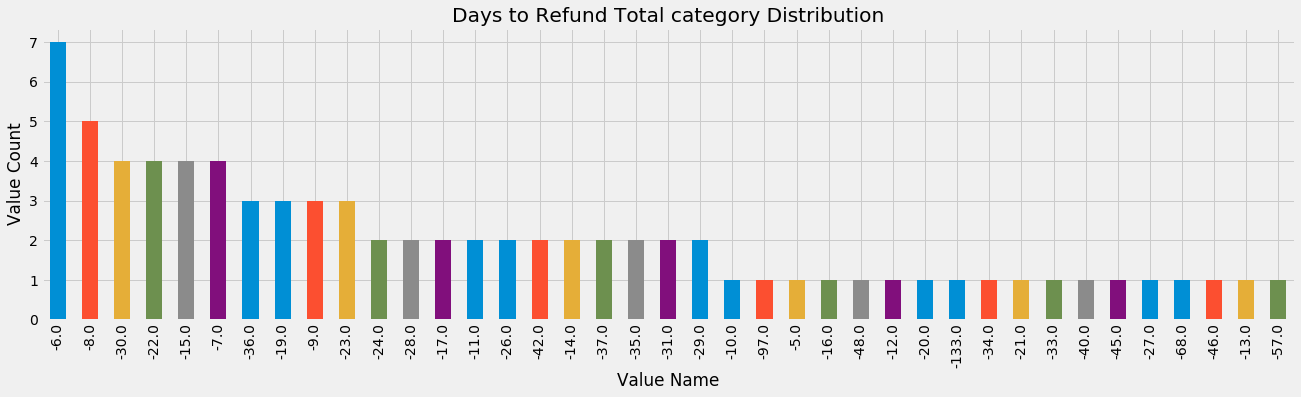

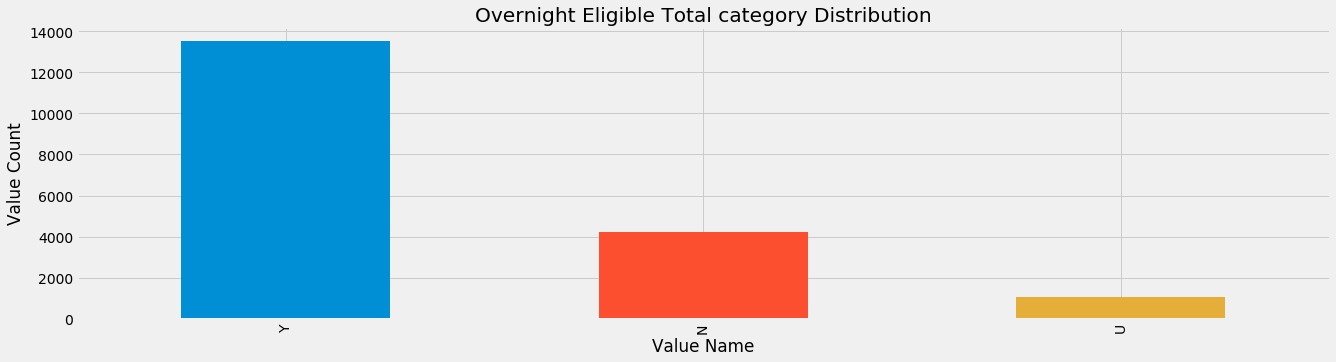

In [138]:
# value count in missing value columns
mis_val_col = ["Airline Alliance","Days to Refund","Overnight Eligible"]
for i in mis_val_col:
    plt.figure(figsize=(20,5))
    flight[i].value_counts().plot.bar()
    plt.xlabel("Value Name")
    plt.ylabel("Value Count")
    plt.title(i+" Total category Distribution")

In [139]:
object_columns = flight.select_dtypes(['object'])
numeric_columns = flight.select_dtypes(['float64','int64'])
date_time = flight.select_dtypes(['datetime64[ns]'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002808EA470B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002809593F5F8>]], dtype=object)

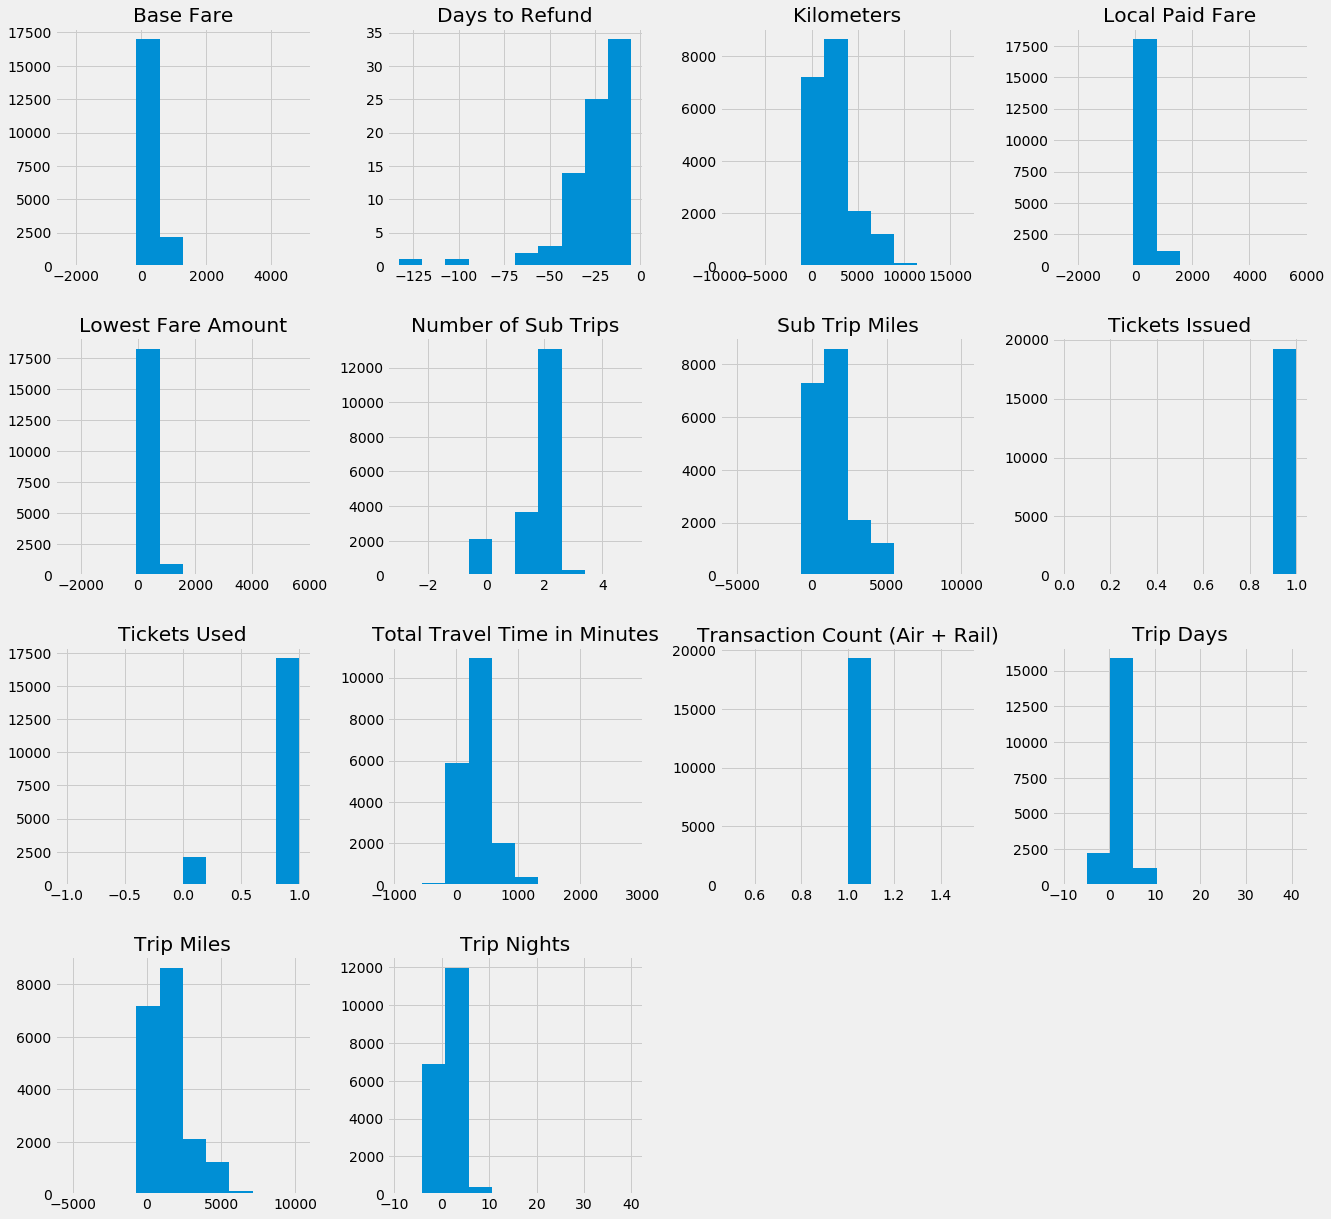

In [140]:
numeric_columns.hist(figsize=(20,20))

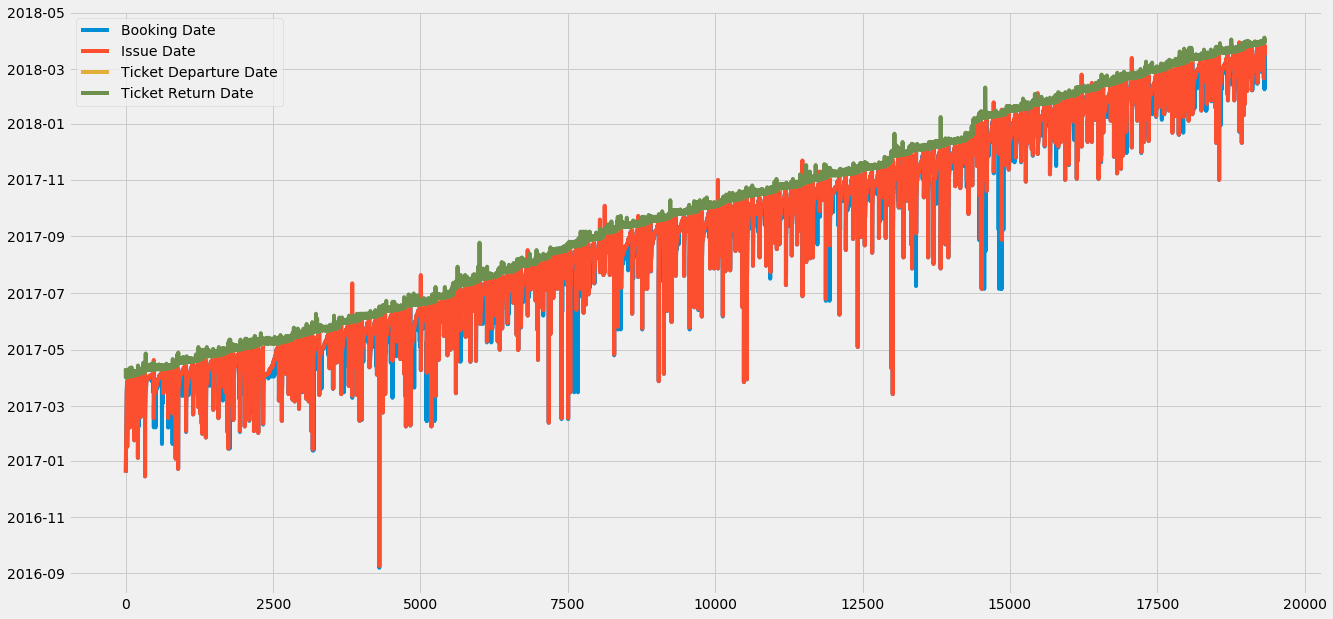

In [141]:
date_time.plot(kind="line", figsize=(20,10))

In [142]:
flight.head()

,Air Booking Description,Air-Rail Without Hotel,Airline Alliance,Base Fare,Booking Date,Booking Method Description,City Routing Description,Class by Coupon,Days to Refund,Destination Airport Code,...,Tickets Used,Total Travel Time,Total Travel Time in Minutes,Transaction Count (Air + Rail),Transaction Type,Travel Purpose,Travel Type Description,Trip Days,Trip Miles,Trip Nights
0,Economy Nett Fare,Y,Sky Team,280.78,2016-12-19,Fully self booked,MINNEAPOLIS/ST.PAUL-SAN FRANCISCO,V/V,NaN,SFO,...,1,07:49:00,469,1,ORIGINAL,Business,AIR,11,3176,10
1,Economy Nett Fare,Y,Low Cost,142.32,2016-12-20,Fully self booked,BOSTON-WASHINGTON,O/P,NaN,DCA,...,1,03:13:00,193,1,ORIGINAL,Business,AIR,5,798,4
2,Economy Nett Fare,N,One World,85.69,2017-01-04,Fully self booked,BOSTON-WASHINGTON,S,NaN,DCA,...,1,01:46:00,106,1,ORIGINAL,Business,AIR,1,399,0
3,Economy Nett Fare,N,Low Cost,202.79,2017-01-06,Fully self booked,BOSTON-WASHINGTON,R/P,NaN,DCA,...,1,03:07:00,187,1,ORIGINAL,Business,AIR,5,798,4
4,Economy Nett Fare,Y,Low Cost,309.77,2017-01-12,Fully self booked,BOSTON-LOS ANGELES,N/S,NaN,LAX,...,1,11:45:00,705,1,ORIGINAL,Business,AIR,8,5216,7


In [145]:
# filling the missing value
# flight["Days to Refund"].value_counts()
flight["Days to Refund"] = flight["Days to Refund"].fillna(flight["Days to Refund"].mean())
flight["Airline Alliance"] = flight["Airline Alliance"].fillna('NA')
flight["Overnight Eligible"] = flight["Overnight Eligible"].fillna('NA')

In [146]:
numeric_columns["Days to Refund"] = numeric_columns["Days to Refund"].fillna(numeric_columns["Days to Refund"].mean())
numeric_columns.head()

,Base Fare,Days to Refund,Kilometers,Local Paid Fare,Lowest Fare Amount,Number of Sub Trips,Sub Trip Miles,Tickets Issued,Tickets Used,Total Travel Time in Minutes,Transaction Count (Air + Rail),Trip Days,Trip Miles,Trip Nights
0,280.78,-24.4,5110.184,330.04,330.04,2,3176,1,1,469,1,11,3176,10
1,142.32,-24.4,1283.982,181.20,178.00,2,798,1,1,193,1,5,798,4
2,85.69,-24.4,641.991,106.32,106.32,1,399,1,1,106,1,1,399,0
3,202.79,-24.4,1283.982,246.40,203.00,2,798,1,1,187,1,5,798,4
4,309.77,-24.4,8392.544,361.40,361.40,2,5216,1,1,705,1,8,5216,7


In [147]:
x_train = numeric_columns.drop(["Base Fare"], axis=1)
y_train = numeric_columns["Base Fare"]

In [148]:
x_train.shape,y_train.shape

((19323, 13), (19323,))

# Base Line Model With only Numeric Features

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics   #Additional scklearn functions
from sklearn import preprocessing

# Normalize data

In [150]:
x_train = preprocessing.scale(x_train)
y_train = preprocessing.scale(y_train)

In [151]:
x_train.shape,y_train.shape

((19323, 13), (19323,))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, random_state=42)

In [153]:
# we are loading our algorithm in "forest" variable
gbr = GradientBoostingRegressor(random_state=42,max_depth=15)

# we are telling our algorithm to train from our training dataset
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=15, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [154]:
y_pred = gbr.predict(X_test)

In [155]:
# Here are we are trying to watch our prediction score. How much it can learn from our training and testing data.# Here  

print("Accuracy on training set: {:.3f}".format(gbr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbr.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.994


In [156]:
# y_pred.shape,y_test.shape
import math

math.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.0767419553032631

# Baseline Model with all feature

In [179]:
flight_train = flight.copy()
flight_train.shape

(19323, 53)

# Remove Time base fetures

In [181]:
flight_train = flight_train.drop(['Booking Date', 'Issue Date', 'Ticket Departure Date',
       'Ticket Return Date',"Total Travel Time"], axis=1)
flight_train.shape

(19323, 48)

In [182]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

object_col= flight_train.select_dtypes(include = ["object"]).columns

ohe = OneHotEncoder()
for i in object_col:
    # transform and map pokemon generations
    get_le = LabelEncoder()
    get_labels = get_le.fit_transform(flight_train[i])
    flight_train[i] = get_labels
    print(get_labels)

[1 1 1 ..., 1 1 1]
[1 1 0 ..., 1 0 1]
[3 0 2 ..., 4 2 4]
[2 2 2 ..., 2 0 2]
[2279 1113 1113 ...,   79  255   79]
[1391  791  989 ...,  462  604  357]
[196  61  61 ...,  29  63  29]
[181 210 210 ...,  28  53  28]
[170 198 198 ...,  26  50  26]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[ 4  7  7 ..., 18 41 18]
[1 1 1 ..., 1 1 1]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
[ 8  7  4 ..., 15  4 15]
[ 4  9  2 ..., 16  2 16]
[1751  415  415 ...,  469  995  416]
[1427  447  447 ...,  361  748  369]
[0 0 0 ..., 0 0 0]
[130  25  25 ..., 139 139  54]
[115  22  22 ...,  35  35  49]
[110  22  22 ...,  34  34  46]
[0 0 0 ..., 0 0 0]
[22 18 18 ..., 13 13  5]
[3 3 3 ..., 2 0 2]
[4 4 2 ..., 2 2 2]
[1 1 1 ..., 1 1 1]
[3314  496  495 ..., 3499 3577 1630]
[0 0 0 ..., 0 0 0]
[1 1 1 ..., 1 0 1]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]


# Correlation Matrix

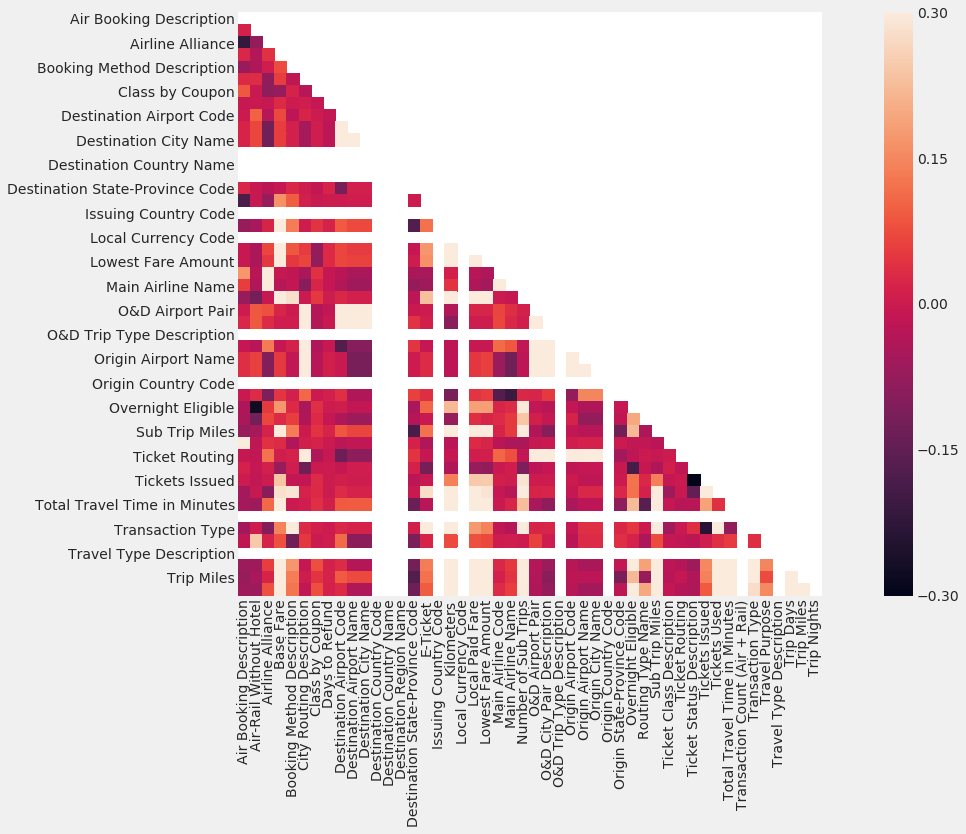

In [237]:
plt.figure(figsize=(20,10))

mask = np.zeros_like(flight_train.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(flight_train.corr(), mask=mask, vmax=.3, square=True)
# sns.heatmap(flights, annot=True, fmt="d")

In [185]:
x_train = flight_train.drop(["Base Fare"], axis=1)
y_train = flight_train["Base Fare"]

In [186]:
x_train.shape,y_train.shape

((19323, 47), (19323,))

In [187]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, random_state=42)

In [192]:
# we are loading our algorithm in "forest" variable
gbr = GradientBoostingRegressor(random_state=42,max_depth=15,n_estimators=100)

# we are telling our algorithm to train from our training dataset
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=15, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [193]:
y_pred = gbr.predict(X_test)

# Here are we are trying to watch our prediction score. How much it can learn from our training and testing data.# Here  

print("Accuracy on training set: {:.3f}".format(gbr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbr.score(X_test, y_test)))

# y_pred.shape,y_test.shape
import math

print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.998
RMSE: 10.01438493320735


Text(0.5,1,'Feature Importance')

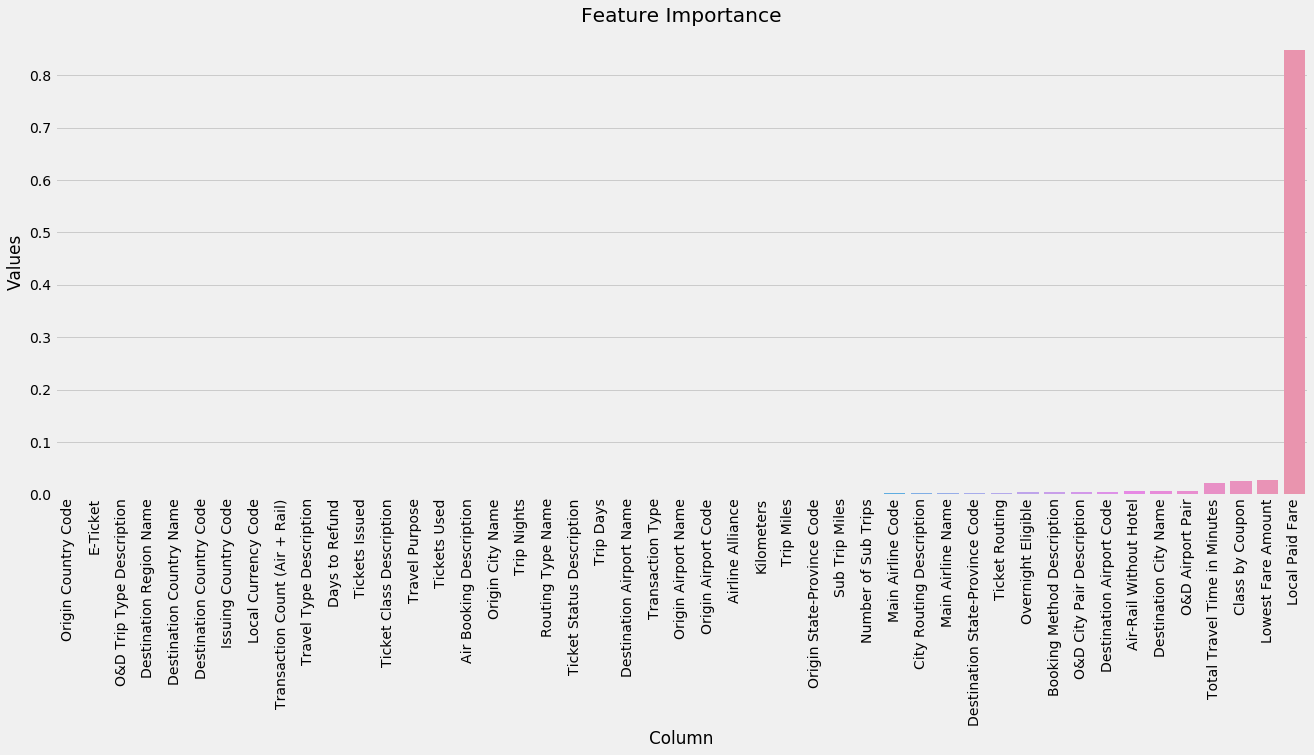

In [238]:
# from sklearn.model_selection import GridSearchCV
#One of the benefits of growing trees is that we can understand how important each of the features are 
# print("Feature Importances" )
# print(gbr.feature_importances_)
# print(x_train.columns)

feature_importance = pd.DataFrame()
feature_importance["Column"] = x_train.columns
feature_importance["Values"] = gbr.feature_importances_
feature_importance = feature_importance.sort_values("Values")
plt.figure(figsize=(20,8))
graph  = sns.barplot(x = feature_importance["Column"],y=feature_importance["Values"],data=feature_importance)
graph.set_xticklabels(feature_importance["Column"],rotation=90)
plt.title("Feature Importance")